In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
import pandas as pd
import tensorflow as tf
train =pd.read_csv('economy/csv/economy_total_data.csv')


In [21]:
train=train.fillna(0)

In [3]:
# Nan을 숫자로 바꾸는 작업

train['meaneduc'].fillna(train['meaneduc'].mean(), inplace = True)
train['SQBmeaned'].fillna(train['SQBmeaned'].mean(), inplace = True)
#the same for test
test['meaneduc'].fillna(test['meaneduc'].mean(), inplace = True)
test['SQBmeaned'].fillna(test['SQBmeaned'].mean(), inplace = True)
train['rez_esc'].fillna(0, inplace = True)
train['v18q1'].fillna(0, inplace = True)
train['v2a1'].fillna(0, inplace = True)

In [4]:
train_h = train.loc[train["parentesco1"]==1]

In [5]:
def drop_feature(df_x1):
    #결과값 y에 해당하는 값 삭제 
    # df_x1 = df_x1.drop(["Target"],1)
    df_x1 = df_x1.fillna(0)
#     #세대주성별 교육년수 
#     df_x1 = df_x1.drop(["edjefa", "edjefe"],1) 
#     #중복정보 제거
#     df_x1 = df_x1.drop(["dependency","female","area2","hacdor","hacapo","bedrooms","r4h3","r4m3"],1) 
#     #수학적으로 의미가 없는 값 제거
#     df_x1 = df_x1.drop(["Id","SQBescolari", "SQBage", "SQBhogar_total", "SQBedjefe", "SQBhogar_nin", "SQBovercrowding","idhogar"],1) 
#     #세대주와의 관계열 제거
#     df_x1 = df_x1.drop(["parentesco1","parentesco2","parentesco3","parentesco4","parentesco5","parentesco6","parentesco7","parentesco8",
#                        "parentesco9","parentesco10","parentesco11","parentesco12"],1)
#     #집을 소유하고 있는 사람들에게 1값부여
#     #df_x1["house"] = df_x1.loc[df_x1["v2a1"] == 0, "v2a1"]
#     #df_x1["house"] = df_x1["house"].fillna(1)
#     # 집세 임시 제거
#     #df_x1['lent'] = (df_x1["v2a1"])
#     df_x1 = df_x1.drop(["v2a1"],1)
#     df_x1['lent'] = df_x1['tamviv']-df_x1['tamhog']
#     df_x1 = df_x1.drop(["r4t1","r4t2","r4t3","tamhog","tamviv"],1) 
#     # 중복 데이터 : 태블릿 수 삭제
#     df_x1 = df_x1.drop(["v18q1"],1) 
#     #벽,지붕, 바닥 좋고 나쁨 정도 중복 
#     df_x1 = df_x1.drop(["epared1","epared2","epared3","etecho1","etecho2","etecho3"],1) 
#     #모든 열이 0인 경우 삭제 
#     df_x1 = df_x1.drop(["elimbasu5", "estadocivil1"],1) 
#     #상관관계가 높은 사항들 제거
#     df_x1 = df_x1.drop(["pisocemento","overcrowding","hhsize"],1)
#     # 개인별 삭제 (실험 해 보아라~~~~): 정배픽
#     #df_x1 = df_x1.drop(["age","lugar1","lugar6","sanitario2","coopele"],1)
#     #정연픽
#     # df_x1 = df_x1.drop(["hogar_nin","hogar_adul","hogar_mayor","hogar_total","paredblolad","meaneduc","qmobilephone"],1)
#     df_x1 = df_x1.drop(["SQBdependency","SQBmeaned","agesq"],1)
#     #진수픽
    
    return df_x1

In [6]:
train_h_drop = drop_feature(train_h)
test_drop = drop_feature(test)
train_h_drop.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,...,81,900,16,81,4,16.000000,1.0,100.0,900,4


# 3d 그래프

In [4]:
# 그래프 그리기

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'darkgrid') #

import os
from pylab import rcParams
rcParams['figure.figsize'] = 25, 12.5

In [23]:
# 문자 들어있는 열과 숫자만 있는 열 구분

categorical = []
numerical = []
for feature in train.columns:
    if train[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)

#train_h_drop[numerical].head()# => test_drop에서 column 추출했기에 target 값 없음 => 뒤에서 합친다.

In [24]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(train[numerical]) # <------- 여기에 데이터 프레임 넣음!! (여기에는 target 값 빠져있음, 뒤에서 넣어줌)

# drop_feature 함수에서 변수 바꾸고 
# 전체를 다시 돌리면 
# 다른거 변화 안시키고 그래프 얻을 수 있음

In [25]:
len(numerical)

74

In [26]:
%%time
tsne2d = TSNE(random_state=4545)
tsne_representation2d = tsne2d.fit_transform(X_scaled)

Wall time: 428 ms


In [27]:
tsne_representation2d = pd.DataFrame(tsne_representation2d, columns = ['First_col', 'Second_col'])
tsne_representation2d['지역'] = train.loc[:,'지역']
#tsne_representation2d['Target'] = train_h_drop.loc[train_h_drop['Target']!= int,'Target']
#train.loc[train['edjefa'] == "no", "edjefa"]
tsne_representation2d['지역']

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 지역, dtype: object

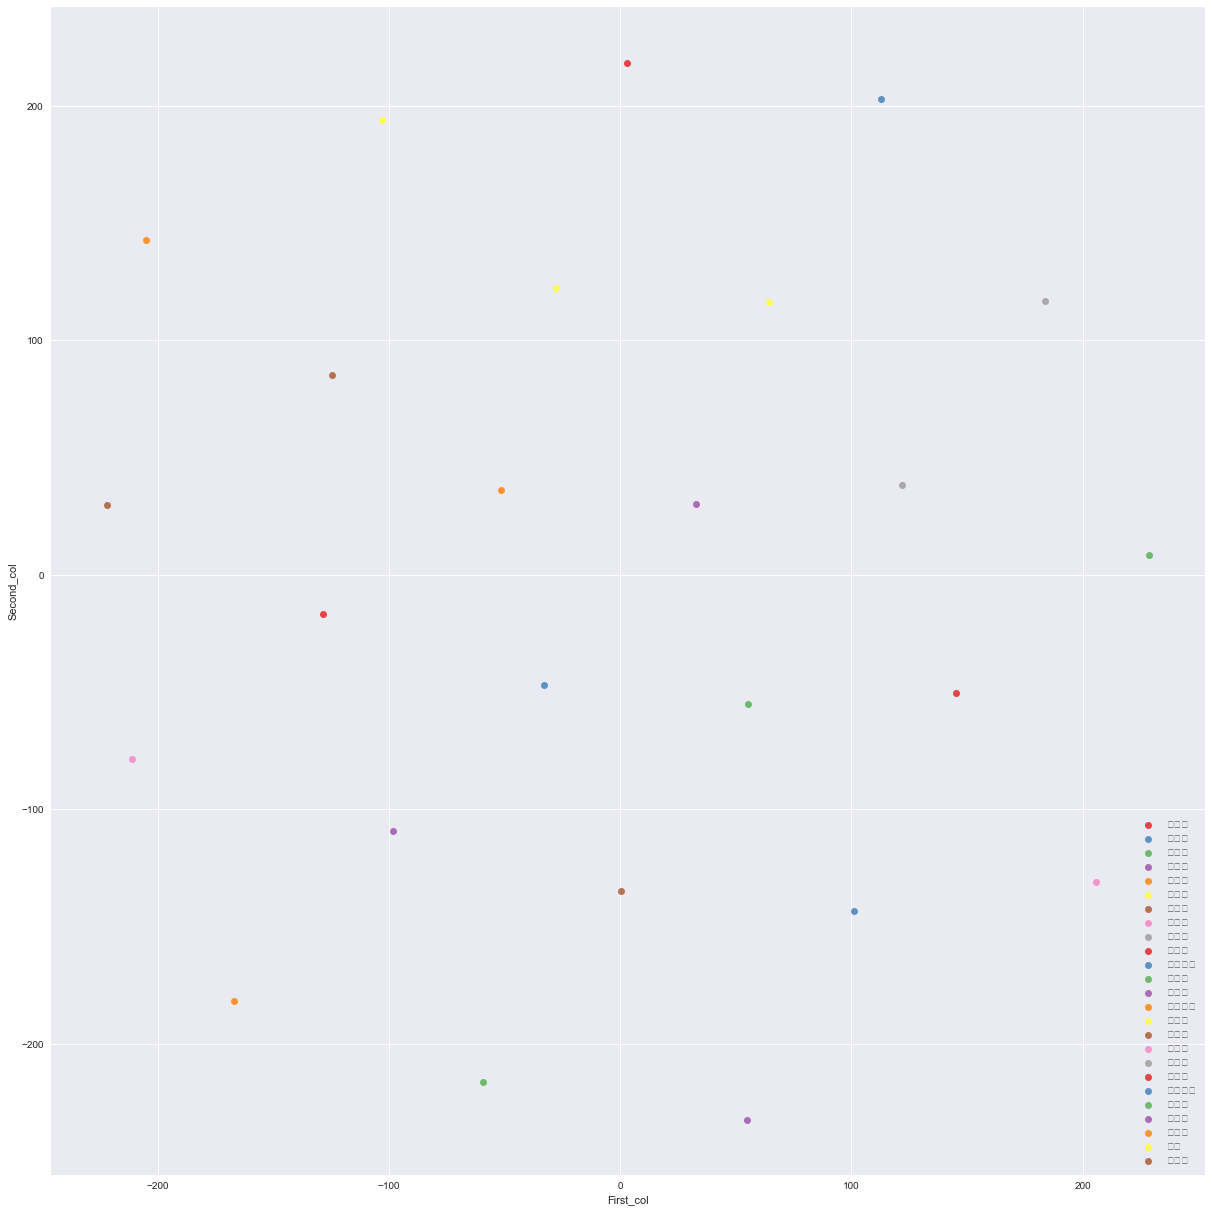

In [28]:
sns.set(font_scale=1, style="darkgrid")
sns.lmplot( x="First_col", y="Second_col", data=tsne_representation2d, fit_reg=False, hue='지역', legend=False, palette="Set1", size = 17)
plt.legend(loc='lower right')

In [29]:
%%time
tsne3d = TSNE(n_components = 3, random_state = 555)
tsne_representation3d = tsne3d.fit_transform(X_scaled)

Wall time: 450 ms


In [30]:
tsne_representation3d = pd.DataFrame(tsne_representation3d, columns = ['First_col', 'Second_col', 'Third_col'])
#tsne_representation3d['Target'] =  train_h_drop.loc[:, 'Target']
#k =  train_h_drop.loc[:, 'Target']
#k

In [31]:
tsne_representation3d.head()

,First_col,Second_col,Third_col
0,159.005707,-248.448807,1.642267
1,262.857758,53.266445,-332.595917
2,-69.245979,-5.803756,55.098076
3,92.883064,207.218536,166.724564
4,-25.766420,212.294678,-16.360573


In [33]:
nodelete = tsne_representation3d.copy()
nodelete.drop(['지역'],1, inplace =True)
nodelete

KeyError: "labels ['지역'] not contained in axis"

In [34]:
k = tsne_representation3d.loc[:, 'Target']
k =pd.DataFrame(k)
k["Index"] = np.arange(2974)
k.set_index("Index",inplace =True)
k = k[0:-1]
k

NameError: name 'train_h_drop' is not defined

In [125]:
kk = pd.concat([tsne_representation3d,k],1)["Target"]

In [87]:
# k = train_h_drop.loc[:, 'Target']
# k = pd.Series(k)
# k["Index"] = [range(0:2973)]
# k
# # tsne_representation3d['Target']

0       4
1       4
2       4
5       4
8       4
12      4
13      4
18      4
20      4
21      4
23      4
26      4
27      4
30      4
33      4
39      4
40      4
43      4
45      4
49      4
53      2
56      4
58      2
59      4
61      4
64      2
68      4
72      4
74      4
77      4
       ..
9477    2
9480    3
9481    4
9485    1
9487    4
9490    3
9492    2
9495    4
9499    4
9502    4
9505    4
9506    3
9507    4
9508    1
9510    4
9512    4
9515    1
9517    4
9519    4
9523    3
9526    4
9528    4
9530    4
9531    4
9534    3
9535    1
9541    2
9545    4
9551    2
9552    2
Name: Target, Length: 2973, dtype: int64

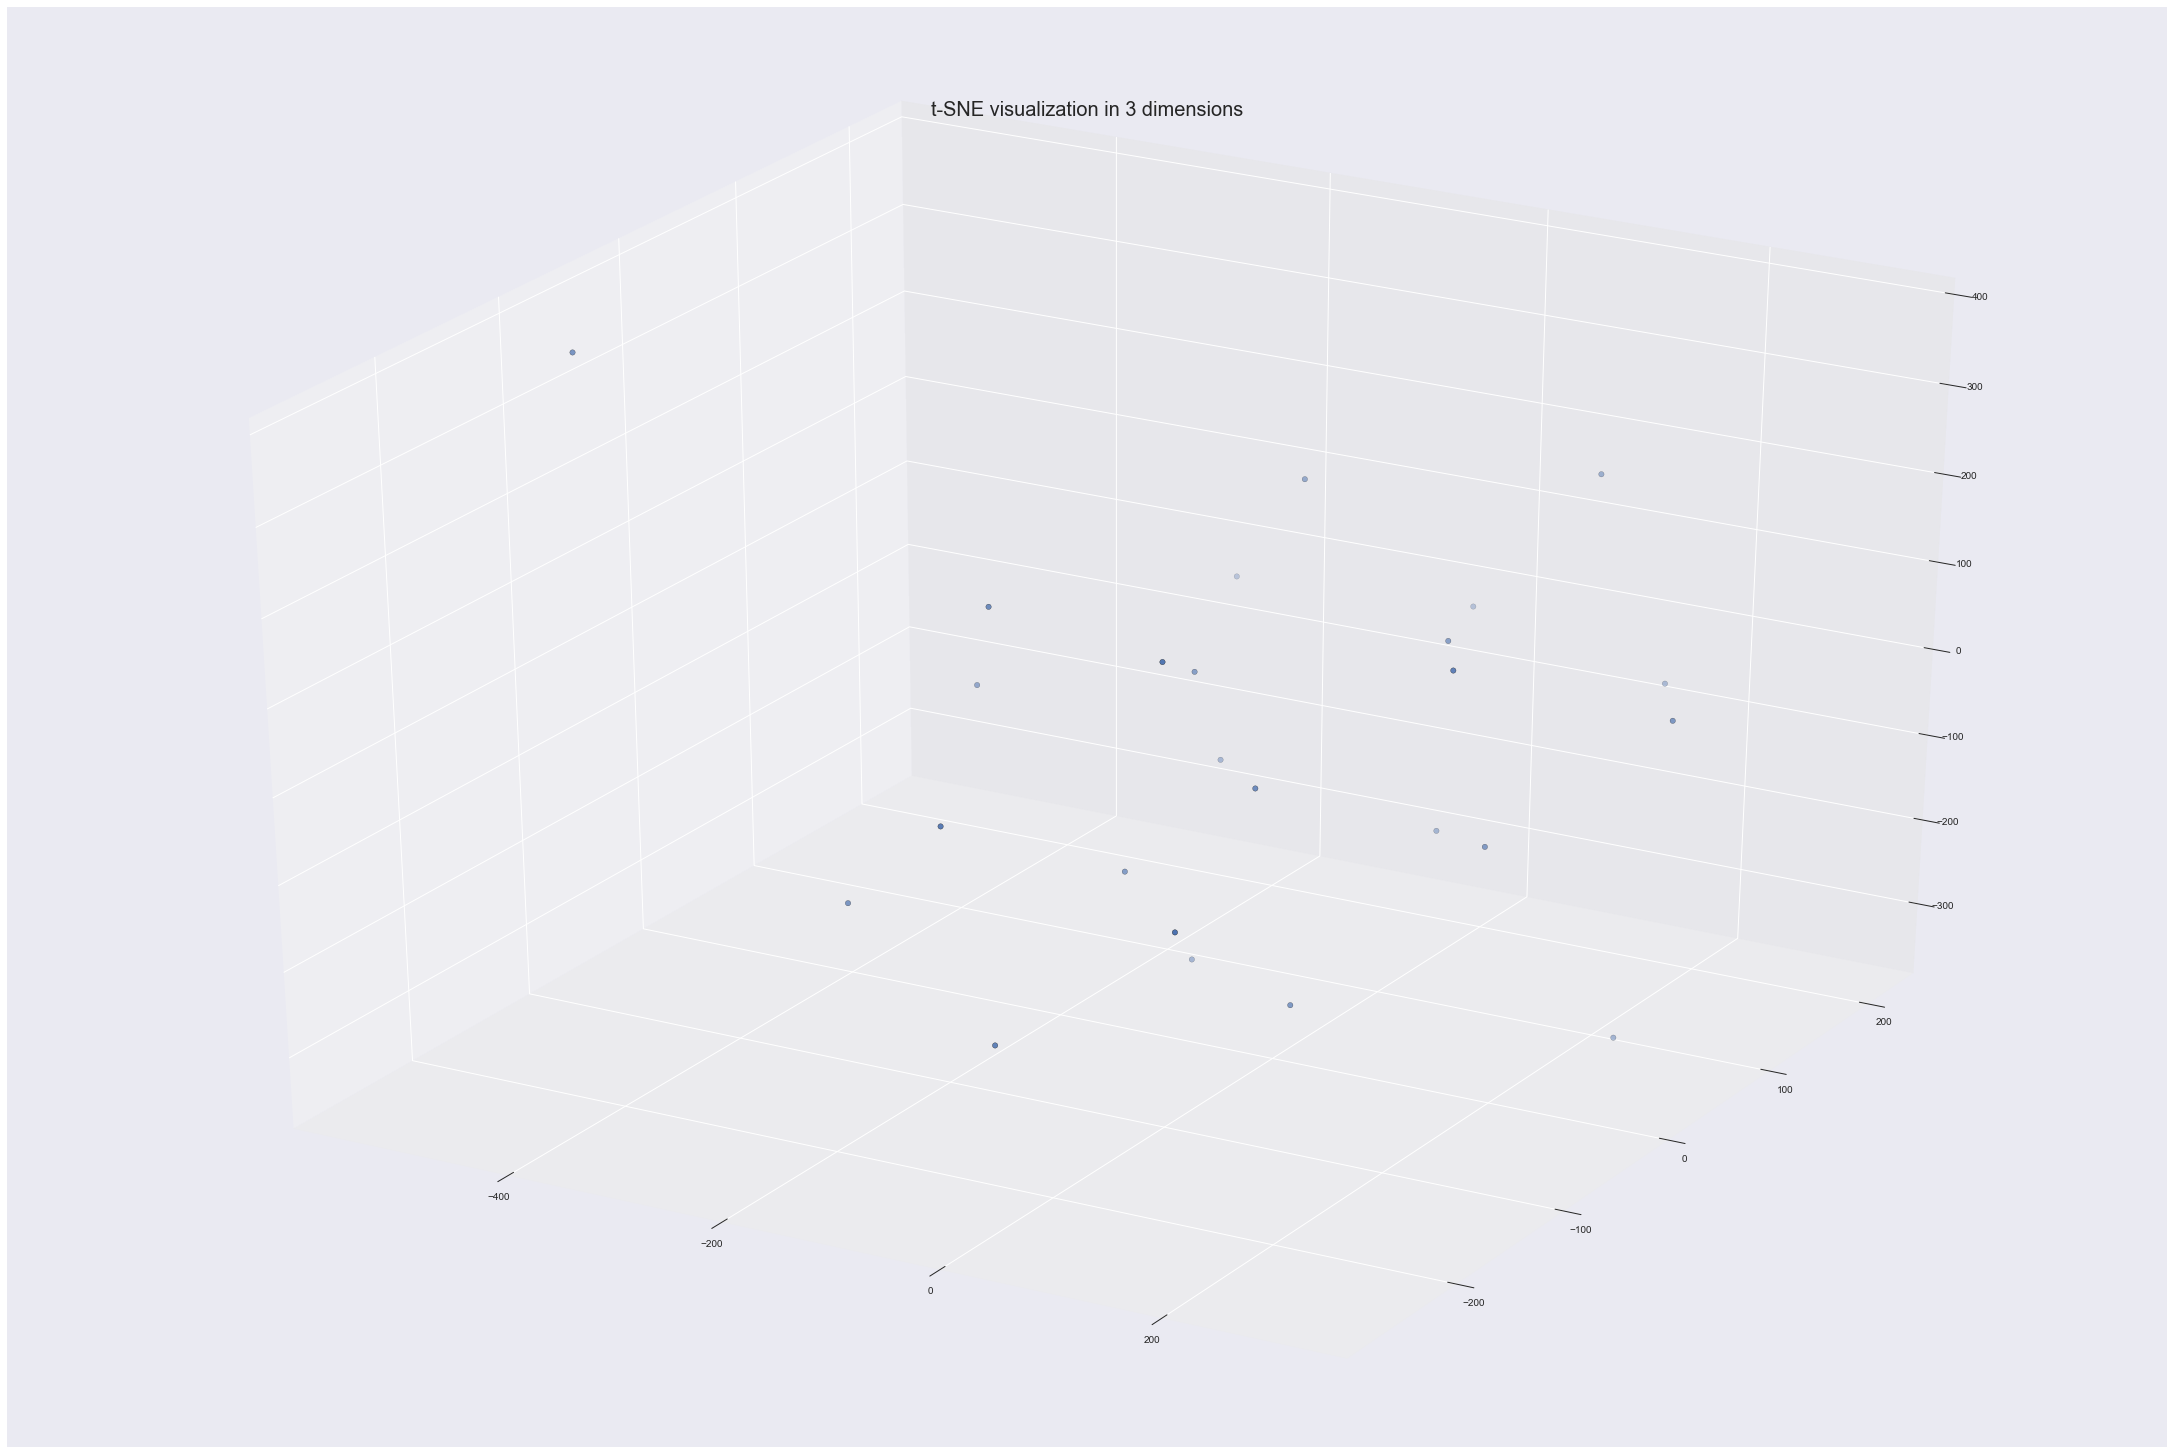

In [36]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
rcParams['figure.figsize'] = 30, 20
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(tsne_representation3d.loc[:, 'First_col'], tsne_representation3d.loc[:, 'Second_col'], tsne_representation3d.loc[:, 'Third_col'], s = 29, 
          edgecolors = 'black',cmap="hsv")
ax.set_title('t-SNE visualization in 3 dimensions', size = 20)



pyplot.show()

In [29]:
#print(tsne_representation3d.loc[:, 'First_col'])

In [ ]:
#! pip install plotly 

In [ ]:
#! pip install plotly --upgrade

In [50]:
# x1 = tsne_representation3d.loc[:, 'First_col'].astype(list)
# y1 = tsne_representation3d.loc[:, 'Second_col'].astype(list)
# z1 = tsne_representation3d.loc[:, 'Third_col'].astype(list)
tsne_representation3d['Target']

0       4.0
1       4.0
2       4.0
3       NaN
4       NaN
5       4.0
6       NaN
7       NaN
8       4.0
9       NaN
10      NaN
11      NaN
12      4.0
13      4.0
14      NaN
15      NaN
16      NaN
17      NaN
18      4.0
19      NaN
20      4.0
21      4.0
22      NaN
23      4.0
24      NaN
25      NaN
26      4.0
27      4.0
28      NaN
29      NaN
       ... 
2943    2.0
2944    NaN
2945    4.0
2946    NaN
2947    NaN
2948    NaN
2949    NaN
2950    4.0
2951    NaN
2952    NaN
2953    4.0
2954    NaN
2955    4.0
2956    4.0
2957    NaN
2958    NaN
2959    4.0
2960    NaN
2961    NaN
2962    NaN
2963    2.0
2964    NaN
2965    NaN
2966    NaN
2967    NaN
2968    4.0
2969    NaN
2970    1.0
2971    NaN
2972    4.0
Name: Target, Length: 2973, dtype: float64

In [48]:
train_h_drop.loc[:, 'Target']

0       4
1       4
2       4
5       4
8       4
12      4
13      4
18      4
20      4
21      4
23      4
26      4
27      4
30      4
33      4
39      4
40      4
43      4
45      4
49      4
53      2
56      4
58      2
59      4
61      4
64      2
68      4
72      4
74      4
77      4
       ..
9477    2
9480    3
9481    4
9485    1
9487    4
9490    3
9492    2
9495    4
9499    4
9502    4
9505    4
9506    3
9507    4
9508    1
9510    4
9512    4
9515    1
9517    4
9519    4
9523    3
9526    4
9528    4
9530    4
9531    4
9534    3
9535    1
9541    2
9545    4
9551    2
9552    2
Name: Target, Length: 2973, dtype: int64

In [31]:
import plotly

from plotly.graph_objs import Scatter3d, Layout

plotly.offline.plot({

    "data": [Scatter3d(x= x1, y=y1, z=z1,  mode='markers',
    marker=dict(
        color='rgb(51, 153, 255)',
        size=1,
        symbol='circle',
        line=dict(
            color='rgb(217, 217, 217)',
            width=1
        ),
        opacity=0.9
    )       )],

    "layout": Layout(margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ))

})

'file://C:\\Users\\student\\Google 드라이브\\Anaconda_src\\team_second\\temp-plot.html'

In [38]:
? plotly.offline.plot

In [36]:
target = train_h_drop["Target"]

train_h_drop[numerical]


X = train_h_drop[numerical].values

Target = target


X_std = StandardScaler().fit_transform(X)

In [32]:
tsne = TSNE()
tsne_results = tsne.fit_transform(X_std) 

NameError: name 'X_std' is not defined

In [130]:
import plotly.graph_objs as go

traceTSNE = go.Scatter(
    x = tsne3d.fit_transform(X_scaled),
    y = kk,
    #name = Target,
#     hoveron = Target,
    mode = 'markers',
#     text = Target.unique(),
    showlegend = True,
    marker = dict(
        size = 8,
        #color = kk,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True,

             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

NameError: name 'py' is not defined